# **3. Del dataset anterior realice en PYTHON, tres algoritmos de preprocesamiento. Explique la razón de aplicar estas técnicas.**





**PREPROCESAMIENTO - NORMALIZACION**

se aplica este algoritmo de escalado para evitar que una caracteristica particular domine el analisis (por ejemplo la velocidad de la rotacion en los 3 ejes son valores altos en comparacion a la velocidad de aceleracion en los 3 ejes, siendo la dimension la velocidad de la rotacion en particular quien domine el analisis de prediccion, ejemplo que se muestra en el grafico). 

Ya que los algoritmos de aprendizaje  tentativos a usar son sencibles a la escala de caracteristicas ( modelos de regresión y los clasificadores basados en distancias).
Por lo tanto, el uso de un algoritmo de escalado puede ayudar a obtener mejores resultado, ya que equilibra la importancia de los caracteristicas y evita que una dimension en particular tenga influencia desproporcionada en el analisis.

La normalización es una técnica de escalado que transforma los datos para que estén en una escala uniforme.

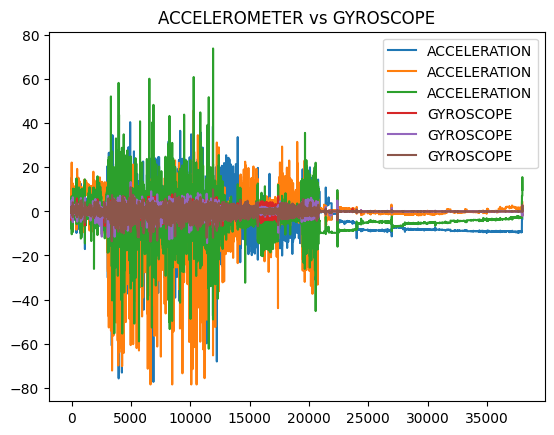

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
datos=pd.read_csv("dataset_actHum.csv")
df=datos[['ACCELEROMETER X (m/s²)','ACCELEROMETER Y (m/s²)','ACCELEROMETER Z (m/s²)','GYROSCOPE X (rad/s)','GYROSCOPE Y (rad/s)','GYROSCOPE Z (rad/s)','Activity']]
plt.plot(df.drop(['GYROSCOPE X (rad/s)','GYROSCOPE Y (rad/s)','GYROSCOPE Z (rad/s)','Activity'],axis=1),label="ACCELERATION")
plt.plot(df.drop(['ACCELEROMETER X (m/s²)','ACCELEROMETER Y (m/s²)','ACCELEROMETER Z (m/s²)','Activity'],axis=1),label="GYROSCOPE")
plt.title("ACCELEROMETER vs GYROSCOPE")
plt.legend()
plt.show()


[[ 4.34564103e-01  6.09330897e-01 -5.00640853e-02 ... -6.29395746e-02
  -8.16972671e-02 -2.67313458e-02]
 [ 3.48270513e-01  6.16170907e-01 -5.58010148e-02 ... -1.15211050e-02
  -9.36263295e-02  6.01040781e-02]
 [ 5.16403094e-01  4.16548915e-01 -2.21213208e-01 ...  6.13605009e-02
  -6.25074262e-02  6.32242545e-02]
 ...
 [-1.39512236e-04  1.44813701e-01  7.12768013e-01 ...  5.16195273e-03
  -5.51073332e-03  2.58097636e-03]
 [ 4.90528053e-02  1.68130267e-01  6.94630377e-01 ...  3.27018702e-03
  -3.83891520e-03 -5.54509973e-03]
 [ 6.46333953e-02  1.29623881e-01  6.98826269e-01 ...  7.14181164e-03
   4.42792321e-03 -3.07097900e-03]]


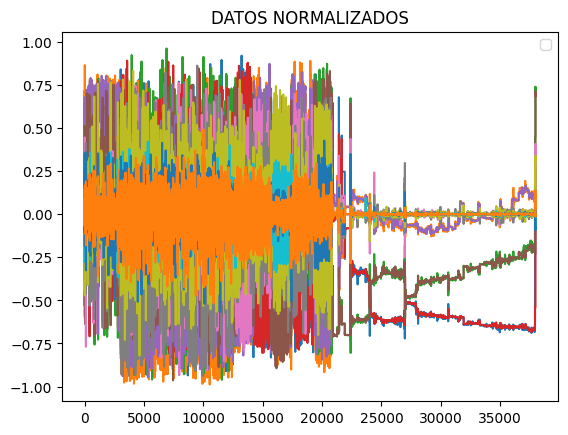

In [54]:
from sklearn import preprocessing
df=datos[['ACCELEROMETER X (m/s²)','ACCELEROMETER Y (m/s²)','ACCELEROMETER Z (m/s²)','GRAVITY X (m/s²)','GRAVITY Y (m/s²)','GRAVITY Z (m/s²)','LINEAR ACCELERATION X (m/s²)','LINEAR ACCELERATION Y (m/s²)','LINEAR ACCELERATION Z (m/s²)','GYROSCOPE X (rad/s)','GYROSCOPE Y (rad/s)','GYROSCOPE Z (rad/s)','Activity']]
tecnica=preprocessing.Normalizer()
datos_normalizados=tecnica.fit_transform(df.drop('Activity',axis=1))
print(datos_normalizados)
plt.plot(datos_normalizados)
plt.title("DATOS NORMALIZADOS")
plt.legend()
plt.show()

**PREPOCESAMIENTO - DETECCION DE OUTLIER**

un outlier o valor atípico es aquel que se “escapa” del rango normal de valores de la variable que se está estudiando en este caso identificacion de actividad humana mediante sensores de un telefono movel.
Generalmente se producen por errores en las mediciones o describen fenómenos que no representan el funcionamiento común de lo que se está, cual consideramos que es el caso

quartil_1 = -0.0837
quartil_2= 0.0887
rango_interq = 0.1724
mediana = 0.001
lim_sup_datosNoAtipicos = -0.3423
lim_inf_datosNoAtipicos = 0.1749
valor_min = -14.3564
valor_max = 13.3279
IDENTIFICACION DE VALORES ATIPICOS
valor_min = -14.3564 va por debajo lim_inf_datosNoAtipicos (<) 0.1749 Por lo tanto es un valor ATIPICO
valor_max = 13.3279 va por debajo lim_sup_datosNoAtipicos (>) -0.3423 Por lo tanto es un valor ATIPICO


<function matplotlib.pyplot.show(close=None, block=None)>

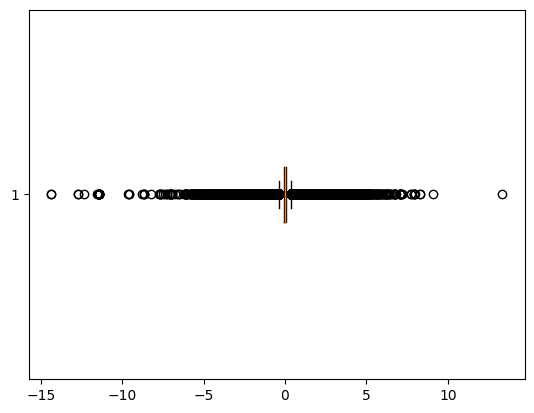

In [57]:
#comprobamos la existencia de los outlier analiticamente en nuestra dataset,
#mediante el MÉTODO IQR(son atipicos si todo valor <Q1-1.5RIQ o >Q1+1.5RIQ, donde RIQ es el rango intercuartiles ")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
datos=pd.read_csv("dataset_actHum.csv")
df=datos[['ACCELEROMETER X (m/s²)','ACCELEROMETER Y (m/s²)','ACCELEROMETER Z (m/s²)','GRAVITY X (m/s²)','GRAVITY Y (m/s²)','GRAVITY Z (m/s²)','LINEAR ACCELERATION X (m/s²)','LINEAR ACCELERATION Y (m/s²)','LINEAR ACCELERATION Z (m/s²)','GYROSCOPE X (rad/s)','GYROSCOPE Y (rad/s)','GYROSCOPE Z (rad/s)','Activity']]
#calculo para la identificacion de valores atipicos
def identificar_par(x):
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    RIQ=Q3-Q1
    mediana=x.median()
        #limites de los valores no atipicos Q1-1.5*RIQ y Q1+1.5*RIQ
    BI_calculado=Q1-1.5*RIQ
    BS_calculado=Q1+1.5*RIQ
      #posibles valores atipicos
    valor_min=x.min()
    valor_max=x.max()
    #RESULTADOS
    return([Q1,Q3,RIQ,mediana,BI_calculado,BS_calculado,valor_min,valor_max])

parametros=identificar_par(df['GYROSCOPE Y (rad/s)'])
print("quartil_1 =",parametros[0])
print("quartil_2=",parametros[1])
print("rango_interq =",parametros[2])
print("mediana =",parametros[3])
print("lim_sup_datosNoAtipicos =",parametros[4])
print("lim_inf_datosNoAtipicos =",parametros[5])
print("valor_min =",parametros[6])
print("valor_max =",parametros[7])
print("IDENTIFICACION DE VALORES ATIPICOS")
print("valor_min =",parametros[6], "va por debajo lim_inf_datosNoAtipicos (<)", parametros[5], "Por lo tanto es un valor ATIPICO")
print("valor_max =",parametros[7], "va por debajo lim_sup_datosNoAtipicos (>)", parametros[4], "Por lo tanto es un valor ATIPICO")
#GRAFICAMENTE tambien se muestra la existencia de valores atipicos
plt.boxplot((df['GYROSCOPE Y (rad/s)'],), vert=False)
plt.show 

In [58]:
#Identificamos todo el conjunto de outlers meniante el medodo conocido como Local Outlier Factor (LOF).
# Este es un algoritmo no-supervisado que calcula la densidad local de un punto dado con respecto a sus vecinos más cercanos.
# Aquellos puntos que tienen menos densidad que sus vecinos son considerados outliers.
from sklearn.neighbors import LocalOutlierFactor
#contamination (la variable contamination) es el porcentaje de datos que puede que sean outliers
#n_neighbors es el numero de vecinos sobre el cual calcula la densidad
x= df.drop('Activity', axis=1)
tecnica = LocalOutlierFactor(n_neighbors=20,contamination=0.1)
outlier_lof=tecnica.fit_predict(x)
outliers = x[outlier_lof == -1]
print("Numero total de filas donde se detecto valores atipicos es: ",(outlier_lof==-1).sum())
print("filas donde a detectado outlier son:")
outliers

Numero total de filas donde se detecto valores atipicos es:  3798
filas donde a detectado outlier son:


,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s)
0,6.649,9.323,-0.766,5.723,7.963,-0.081,-0.186,0.781,1.708,-0.963,-1.250,-0.409
3,9.567,4.444,-6.024,8.223,3.252,-4.240,2.216,2.354,-0.060,-0.173,-0.217,0.448
7,-1.707,12.158,4.915,0.491,9.123,3.563,4.466,6.316,-9.834,1.668,1.013,1.895
8,2.914,7.089,-2.758,1.714,8.919,-3.700,1.922,-1.053,-0.157,2.257,0.124,-0.965
12,15.376,10.029,6.888,4.249,7.068,5.307,11.127,2.961,1.581,1.770,-2.620,0.895
...,...,...,...,...,...,...,...,...,...,...,...,...
37893,-9.553,1.369,-2.356,-9.277,1.540,-2.782,0.095,-0.069,-0.108,0.049,-0.108,0.014
37894,-9.459,1.549,-2.444,-9.279,1.523,-2.786,0.003,0.055,0.094,-0.020,0.062,-0.005
37895,-9.222,1.645,-2.725,-9.276,1.530,-2.789,-0.037,-0.056,-0.145,-0.002,0.018,0.006
37896,-9.234,1.724,-2.780,-9.276,1.531,-2.788,0.061,0.156,0.028,-0.002,0.003,-0.003
